# Assignment 2, Group 17 
November 28, 2021

Derek Yadgaroff, Bjørn Weinbach, Roman Denkin

## 0 Presteps

In [208]:
cameraman = imread("images/lab2/cameraman.png");
wagon = imread("images/lab2/wagon.png");
wagon_noise = imread("images/lab2/wagon_shot_noise.png");

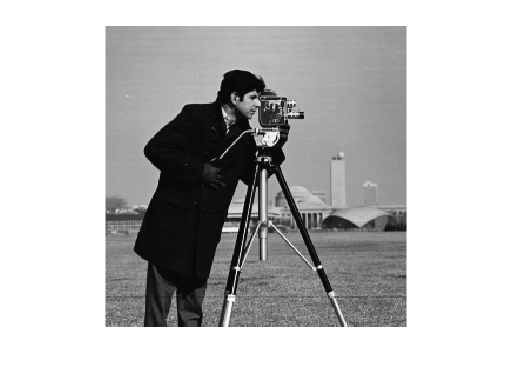

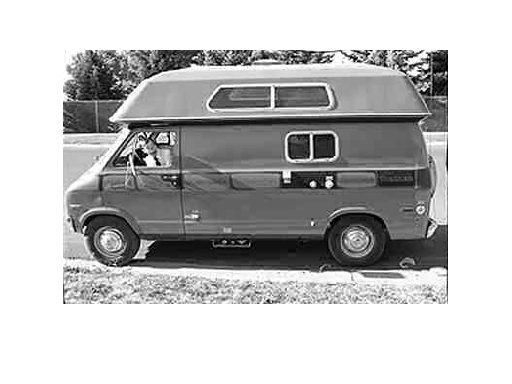

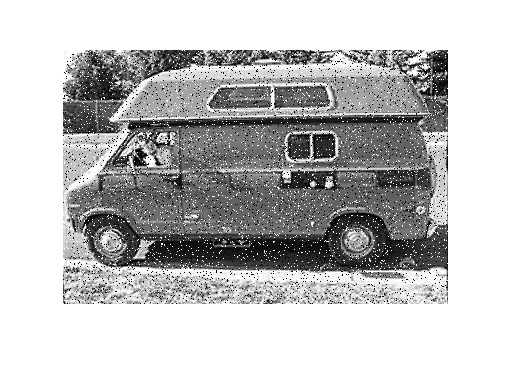

In [209]:
imshow(cameraman)
figure
imshow(wagon)
figure
imshow(wagon_noise)

## 1 Convolution
Use the function conv2 or imfilter to apply different convolution operators to an image. Using the function fspecial you may create different filter kernels to be used. Using the option ’same’ in conv2 you get a result that has the same size as the first argument of the function (typically your image). The commands conv2 and imfilter are similar, but to use conv2 you need to convert the image and the kernel to double before. The imfilter command can filter uint8 images directly.


### 1.1
Examine at least 3 different filter kernels, among which there should be at least one sharpening (edge enhancing) and one smoothing filter and apply them in different sizes to the image cameraman.png, e.g. sizes 3 × 3, 7 × 7 and 31 × 31. Note that some filters are only available in one size when using fspecial. Include at least three figures in your report. One showing the original image, one figure showing the image after sharpening, and one figure showing the image after smoothing. For each filter, explain what the filter does to the image, and explain the effect of the different filter sizes.


#### 1.1a
Here is a random filter of shape (4,4) containing double values in the range [0,1]. The conv2 function takes double values so we also convert the cameraman image into doubles. To display the convolved image, we convert it back to uint8 and use imshow

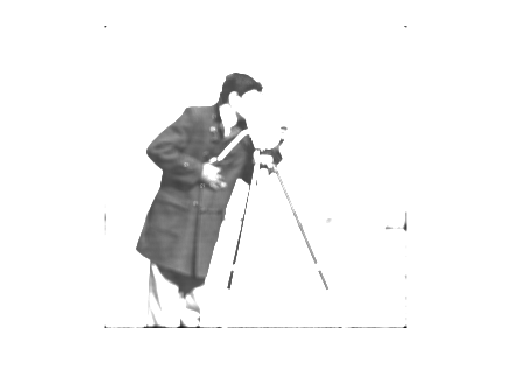

In [210]:
h = rand(4);
img = double(cameraman);
convolved = conv2(img,h);
imshow(uint8(convolved))

Alternatively, we can use the imfilter function without having to do any conversions between uint8 and double. 

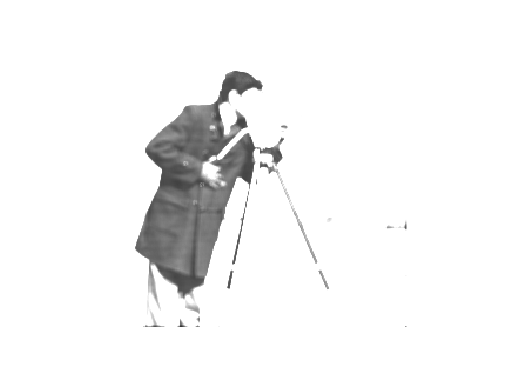

In [211]:
imshow(imfilter(cameraman,  h, 'conv'))

#### 1.1b Edge enhancing
We use fspecial to create predefined filters. The first is the laplacian filter which creates a distinct line on the edges. Below that we show the sobel and prewitt filters side by side for comparison.


These filters use the gradient of the image to identify sharp changes in intensity values. It then uses a small 3x3 convoltion with the image. The convolution matrix is different whether we are highlighting vertical or horizontal lines- essentially the middle row is zeros for horizontal and for veritcal, the middle column is zeros. 

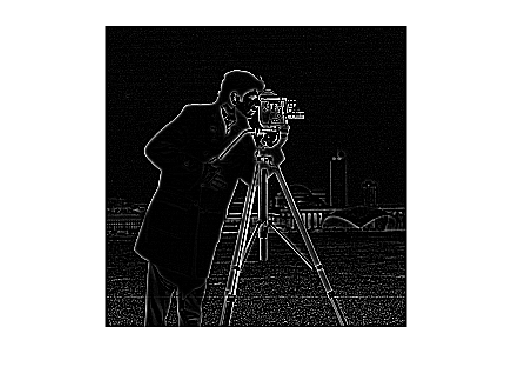

In [212]:
imshow(imfilter(cameraman,  fspecial("log",5), 'conv'))

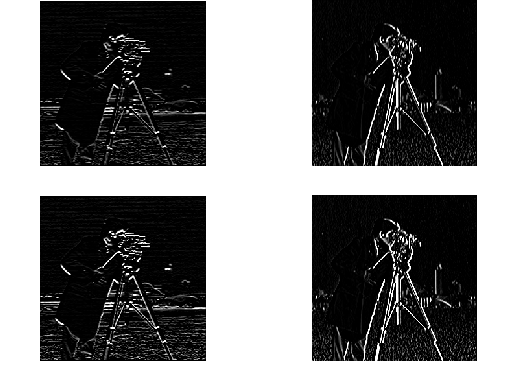

In [213]:
tiledlayout(2,2,'TileSpacing','compact','Padding','tight');
nexttile
imshow(imfilter(cameraman,  fspecial("prewitt"), 'conv'))
nexttile
imshow(imfilter(cameraman,  fspecial("prewitt").', 'conv'))
nexttile
imshow(imfilter(cameraman,  fspecial("sobel"), 'conv'))
nexttile
imshow(imfilter(cameraman,  fspecial("sobel").', 'conv'))

#### 1.1c Smoothing
To smoothe the image out we can use the average filter. Below we show the effect at various kernel sizes. The larger the kernel, the more area of which is used in the transformation. The filter itself is quite basic, sampling from each of the convolution pixels equally at each step.

Below the average, we use the disk filter, which is similar but uses a circular shape for the kernel instead. You can see the difference in the resulting image which has rounder blending effects rather than the average which has pointier effects.

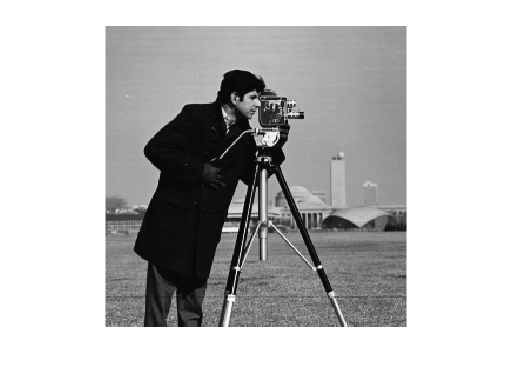

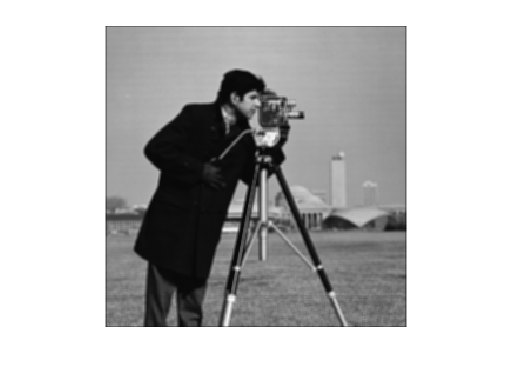

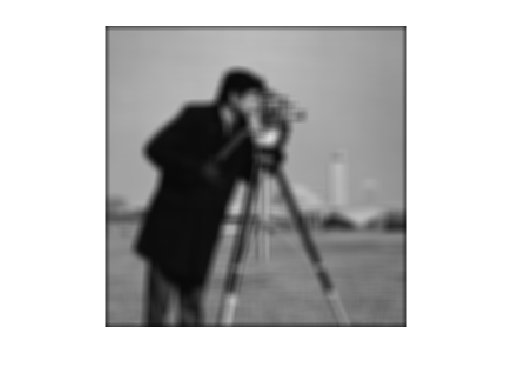

In [214]:
% fspecial('average',[7 7])
imshow(cameraman)
figure
imshow(imfilter(cameraman,  fspecial('average',[3 3]), 'conv'))
figure
imshow(imfilter(cameraman,  fspecial('average',[9 9]), 'conv'))

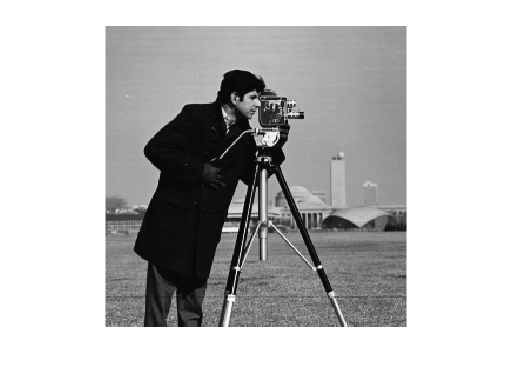

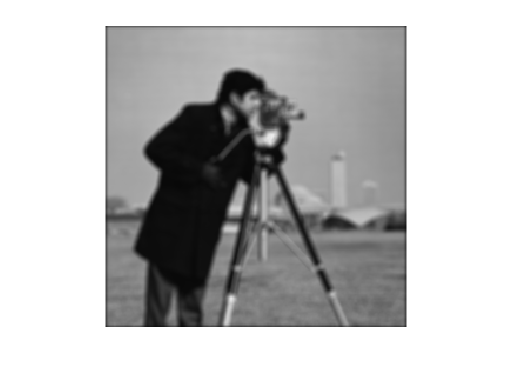

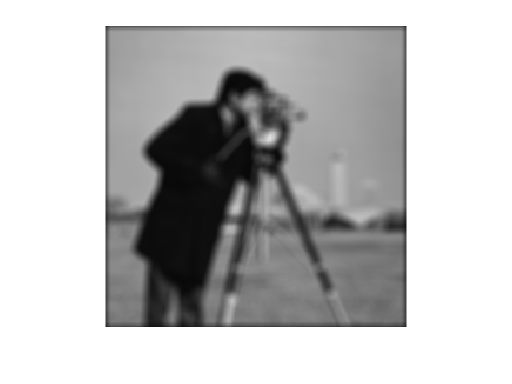

In [215]:
% fspecial('disk',5)
imshow(cameraman)
figure
imshow(imfilter(cameraman, fspecial('disk',3), 'conv'))
figure
imshow(imfilter(cameraman, fspecial('disk',5), 'conv'))

### 1.2. Are the filters with filter kernels ’average’, disk’ and gaussian’ examples of low-pass, band-pass or high-pass filters?

These filters are low pass. This means they let low frequencies pass through and filter out high frequencies. Low frequencies are those where we see a "slower" change in intensity values. So using a low-pass filter means we are doing something which will have a greater effect on the high frequency values.

### 1.3. Demonstrate how you can synthesize low-pass, band-pass and high-pass filtered images using simple arithmetics and filter kernels mentioned in Question 2.

A filter is composed of the matrix size and the values of the matrix. A low pass filter contains values which lower the image values and do so in a somewhat even way. A high pass filter will increase certain values while decreasing other values. In other words it puts emphasis on some pixels. A band-pass filter is when you want to filter out specific frequencies, so it would be some custom design matrix.

#### 1.3a Low pass

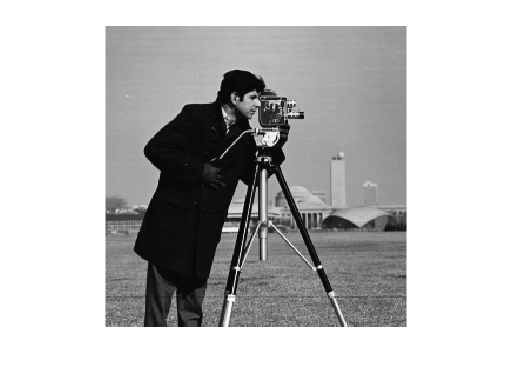

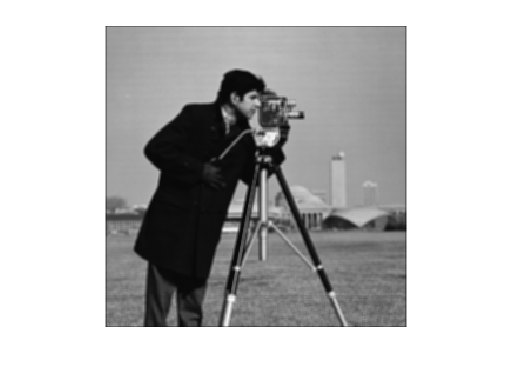

In [216]:
%  smoothing, multiply ones by a constant value
const = 1/9;
mat = [0 1 1 1 0; 0 1 1 1 0; 0 1 1 1 0];
const*mat;
imshow(cameraman)
figure
imshow(imfilter(cameraman, const*mat, 'conv'))

#### 1.3b High pass

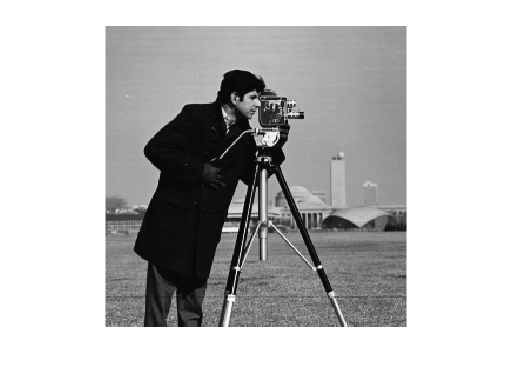

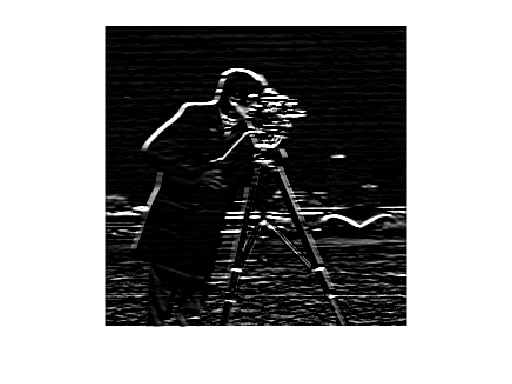

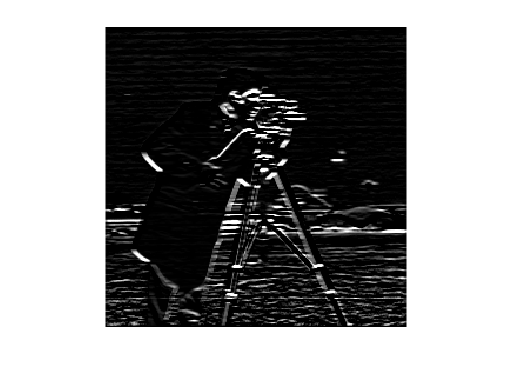

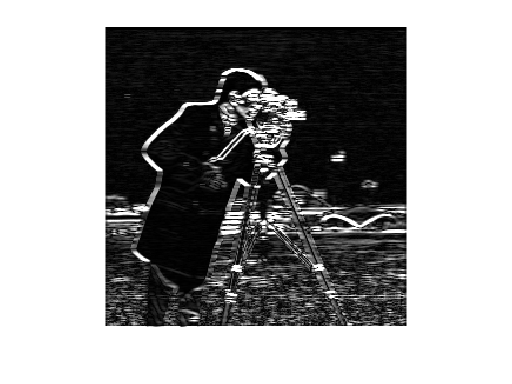

In [217]:
% sharpening, design the matrix you want
imshow(cameraman)
figure

% prewitt light to dark, vertical
mat1 = [-1 -1 -1 -1 -1; 0 0 0 0 0; 1 1 1 1 1];
imshow(imfilter(cameraman, mat1, 'conv'))
figure

% prewitt dark to light, vertical
mat2 = [1 1 1 1 1; 0 0 0 0 0; -1 -1 -1 -1 -1];
imshow(imfilter(cameraman, mat2, 'conv'))
figure

% prewitt both dark to light and light to dark, vertical
bb = uint16(imfilter(cameraman, mat1, 'conv')) + uint16(imfilter(cameraman, mat2, 'conv'));
imshow(uint8(bb))

#### 1.3c band pass

In [218]:
% ??

## 2 Sobel Filter

### 2.4. Use this functionality to demonstrate Sobel filtering on cameraman.png and wagon.png.
You will need to do some arithmetics, since the Sobel filter is not a linear filter and cannot be implemented using convolution alone. You may flip the x- and y-direction of a filter kernel using the matrix transpose command, e.g. A’.


In [219]:
% this is already done? not sure what I need to do

## 3 Median Filter

### 3.5. Open the image wagon shot noise.png. Perform median filtering on the image using different sizes of the filter masks.


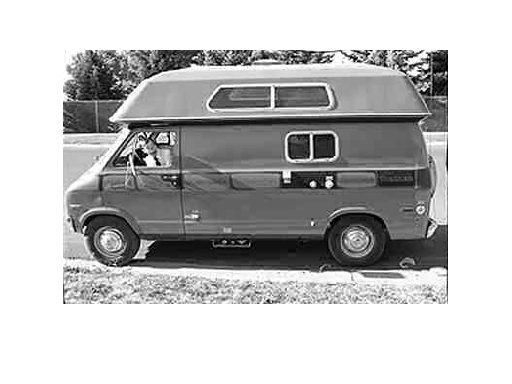

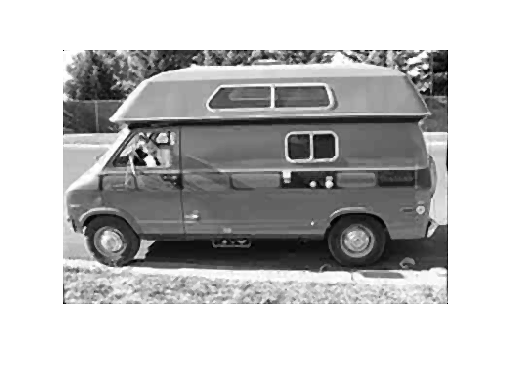

In [220]:
imshow(wagon)
figure
imshow(medfilt2(wagon))

### 3.6. Compare visually the effect of median filtering to the effect of mean and Gauss filtering.

Median filter is a kind of smoothing where we are able to remove small details through replacement rather than through blending. To do this, we use the median value of the elements from the neighborhood. This has the effect to tending towards less extreme values, and practically speaking, is a good way to reduce noisy data.

The effect is easier to see when we start increasing the convolution size of the median filter.

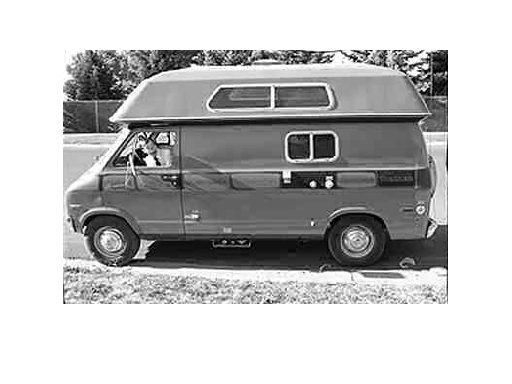

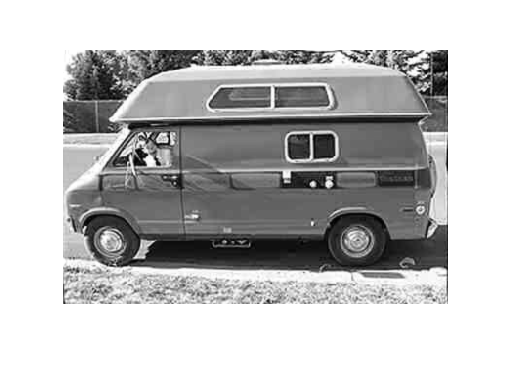

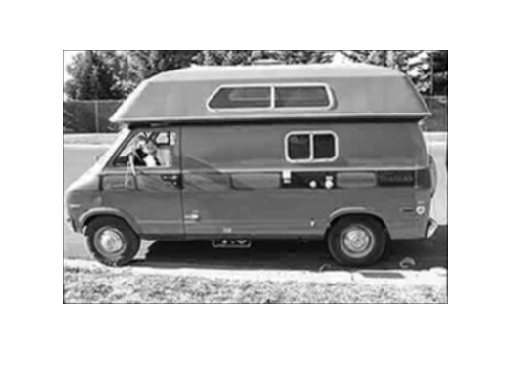

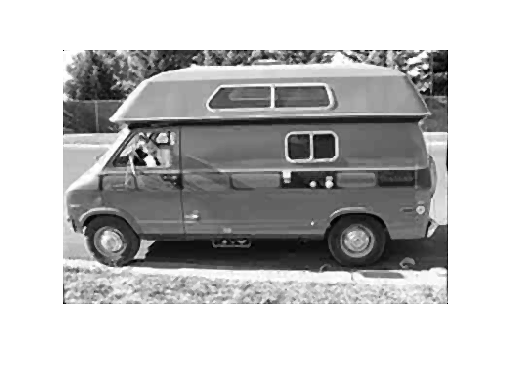

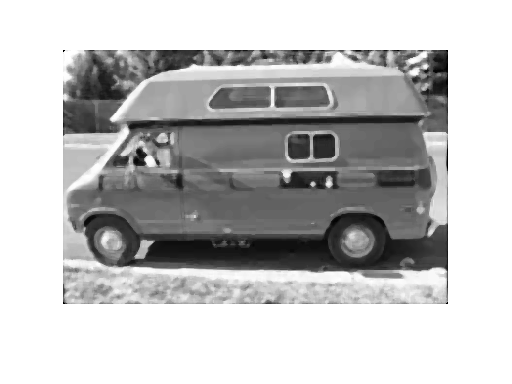

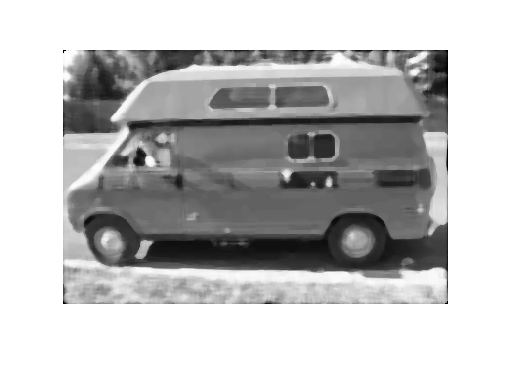

In [221]:
imshow(wagon)
figure
imshow(imgaussfilt(wagon))
figure
imshow(imfilter(wagon,fspecial('average'), 'conv'))
figure
imshow(medfilt2(wagon))
figure
imshow(medfilt2(wagon,[5 5]))
figure
imshow(medfilt2(wagon,[7 7]))

#### 3.6.1. Explain the differences on the image wagon_shot_noise.png. 

The median filter is able to remove the noise by replacing those pixels values with a selected neighboring value- the median. Compared to the other fitlers, it is not using a combination of the neighboring pixels which includes noise. This gives a good opportunity to select a value that is not noise.

#### 3.6.2. How does median filtering work compared to mean and Gauss filtering?

The median filter examines the neighbors and uses the median value from those neighbor's values. It does not blend- it replaces.

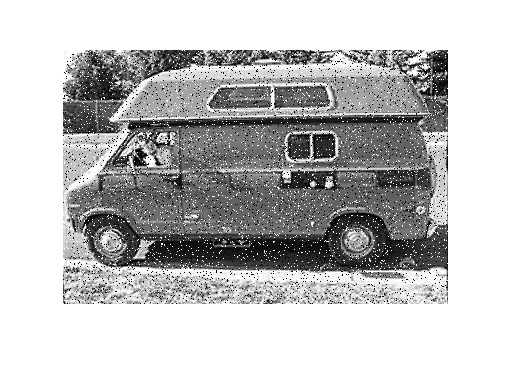

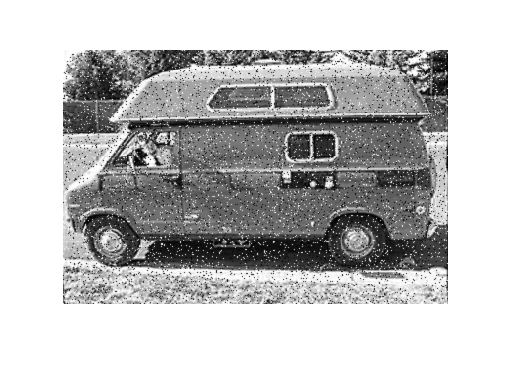

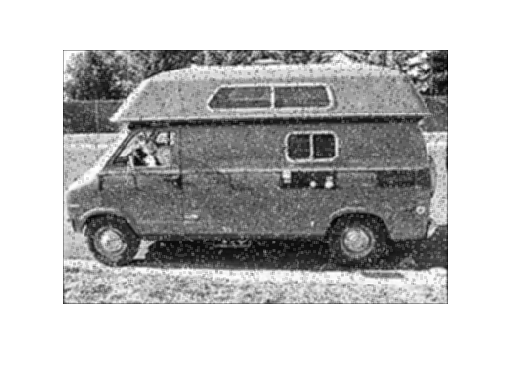

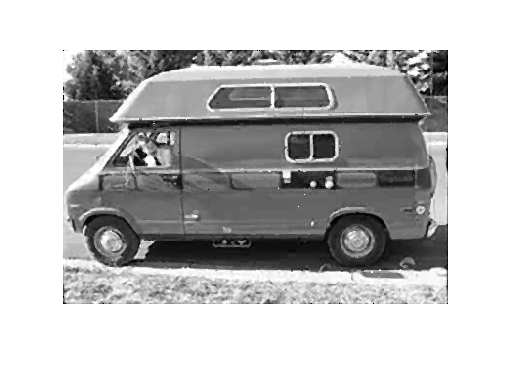

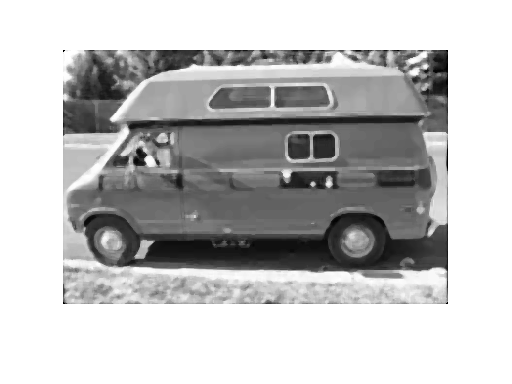

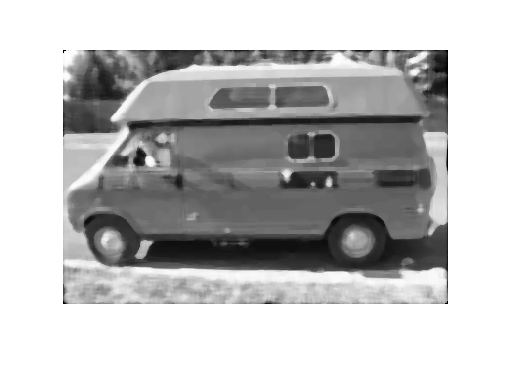

In [225]:
imshow(wagon_noise)
figure
imshow(imgaussfilt(wagon_noise))
figure
imshow(imfilter(wagon_noise,fspecial('average'), 'conv'))
figure
imshow(medfilt2(wagon_noise))
figure
imshow(medfilt2(wagon,[5 5]))
figure
imshow(medfilt2(wagon,[7 7]))

#### 3.7. In general the median filter is more time consuming, why?

The median filter is not a linear operator which means we cannot do an easy matrix operation, we need to iterate over each pixel and perform the function

#### 3.8. Implement your own code for 3x3 median filtering. 
You may use the Matlab function median that computes the median element of a vector. Use for instance two nested for loops to iterate your filter for every neighborhood in the image. The exact behaviour on the borders is not so important for this exercise and you may cut some corners here if it helps you.

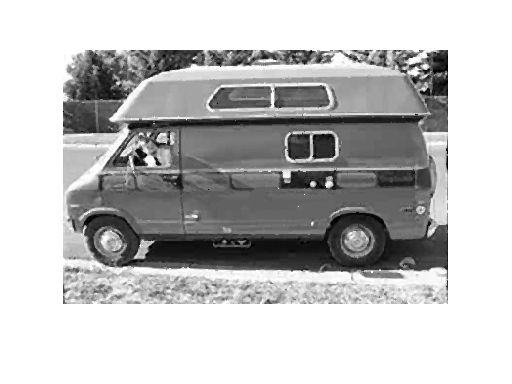

In [352]:
% Create convolution size (must be odd, scalar)... note currently the for loop below only works with conv=3
conv_size = 3;
padding = (conv_size-1)/2;

% Create image with padding, use nearest value (replicate) and add the padding before and after (both)
padded_image = padarray(wagon_noise,[padding padding],'replicate','both');

% Create an output image of same size, resulting image will have a black border if left in this size
outputimage = uint8(zeros(size(padded_image)));

% Get size of matrix for use in nested for loops
[rows, cols] = size(padded_image);

% Iterate over each pixel in the padded image starting from the 2nd index and not including the
% last index (the padding). Assign a value to the output image usign median of the neighborhood from the padded image
% reshape the neighborhood matrix to a vector so it can be used in the matlab function: median
for row = 2:rows-1
    for col = 2:cols-1
        outputimage(row, col) = median( reshape( padded_image(row-padding:row+padding, col-padding:col+padding),[],1));
    end
end

% remove artificial border
outputimage = outputimage(2:end-1,2:end-1);

figure
imshow(outputimage);



#### 3.9. If you implement a Gaussian filter using a large filter mask (and a large standard deviation), why do you get a black border around the image?

Let's take a look at some results using a large filter of consistent size and increase the std dev gradually. We the see the black border becoming more and more prominent.

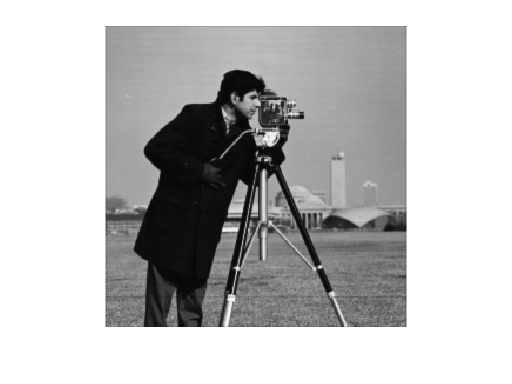

In [353]:
h = fspecial('gaussian',11,.5);
imshow(imfilter(cameraman, h, 'conv'))

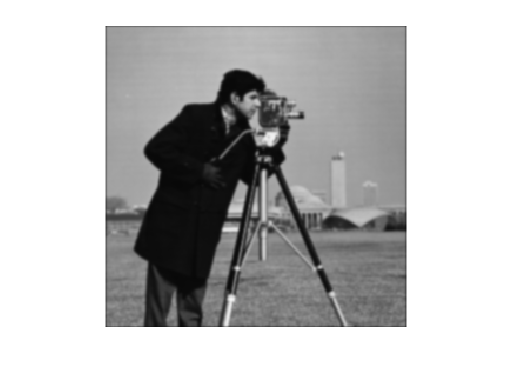

In [354]:
h = fspecial('gaussian',11,1);
imshow(imfilter(cameraman, h, 'conv'))

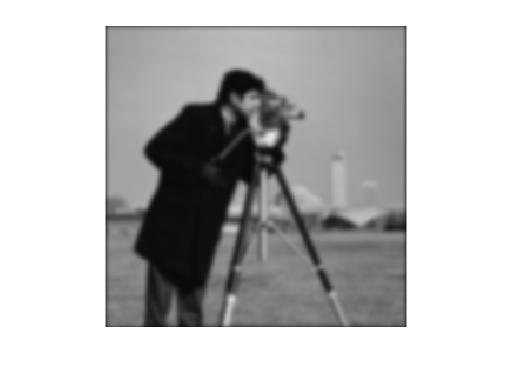

In [355]:
h = fspecial('gaussian',11,2);
imshow(imfilter(cameraman, h, 'conv'))

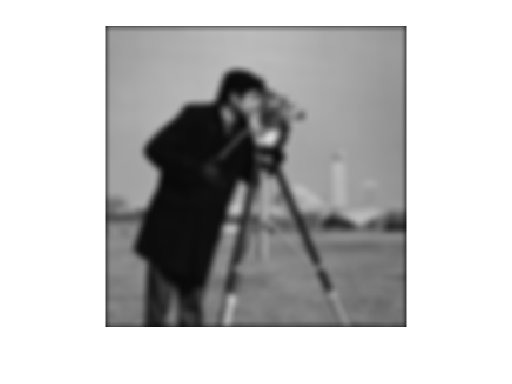

In [356]:
h = fspecial('gaussian',11,3);
imshow(imfilter(cameraman, h, 'conv'))

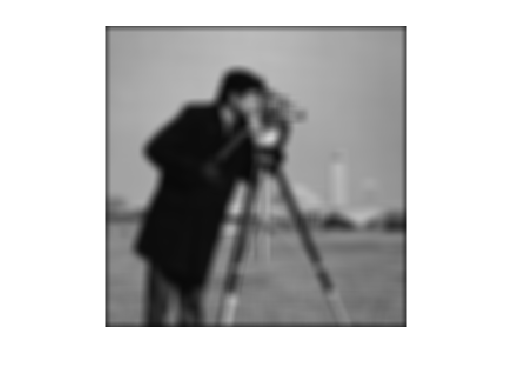

In [357]:
h = fspecial('gaussian',11,5);
imshow(imfilter(cameraman, h, 'conv'))

## 4 Fast Fourier Transform
Can you see a relationship between the lines in the Fourier spectra and the lines in the original image? Hint: Figure 1 shows a few example images, and their corresponding Fourier spectra.

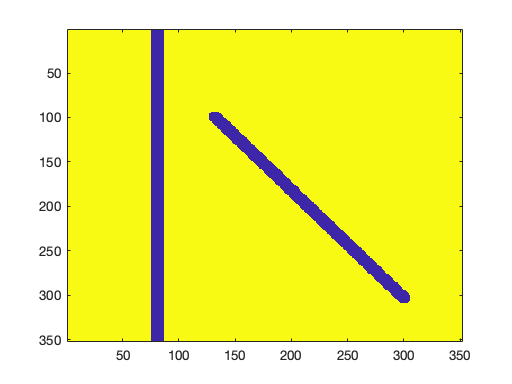

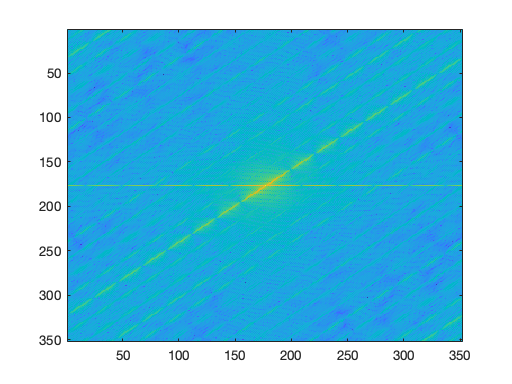

In [335]:
im = double(imread("images/lab2/lines.png")); 
f = fftshift(fft2(im));
figure; imagesc(im);
figure; imagesc(log(abs(f)));

### 4.10. Repeat the same procedure with the image cameraman.png. Comment on the spectrum that you see and compare it to the ordinary representation of the image. You may also try other images, for example circle.png or rectangle.png.

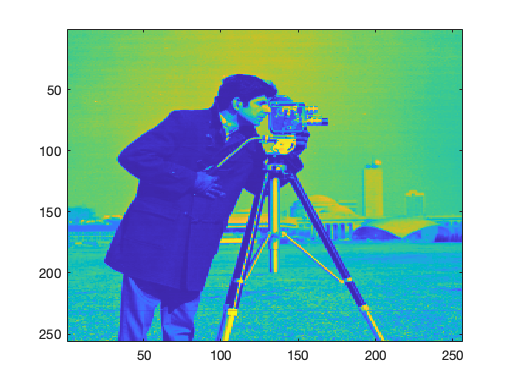

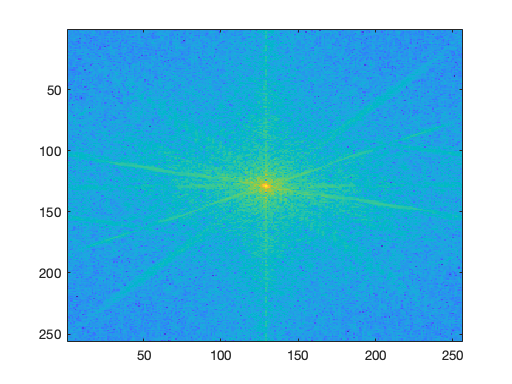

In [336]:
im = double(imread("images/lab2/cameraman.png")); 
f = fftshift(fft2(im));
figure; imagesc(im);
figure; imagesc(log(abs(f)));

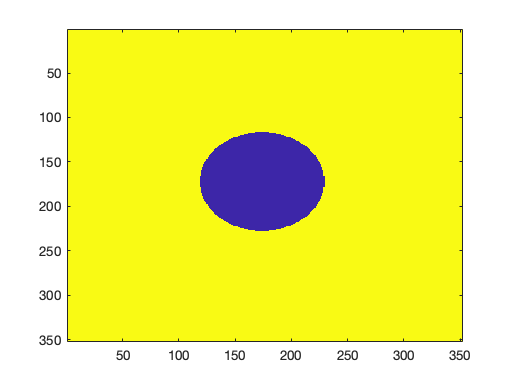

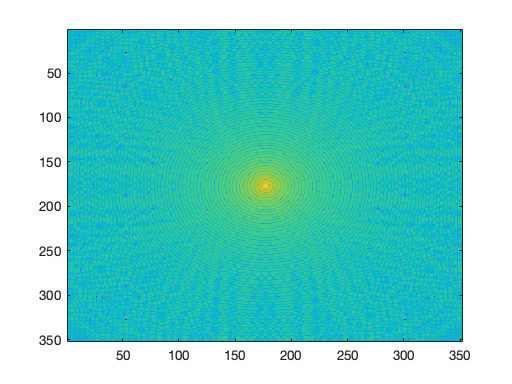

In [337]:
im = double(imread("images/lab2/circle.png")); 
f = fftshift(fft2(im));
figure; imagesc(im);
figure; imagesc(log(abs(f)));

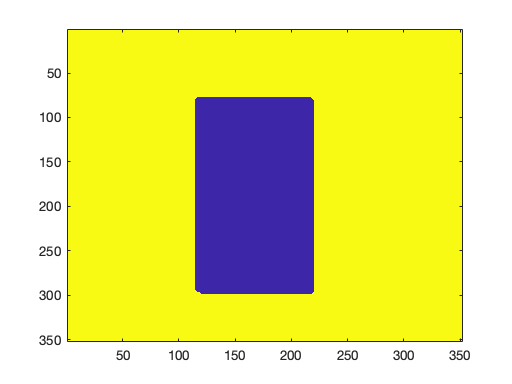

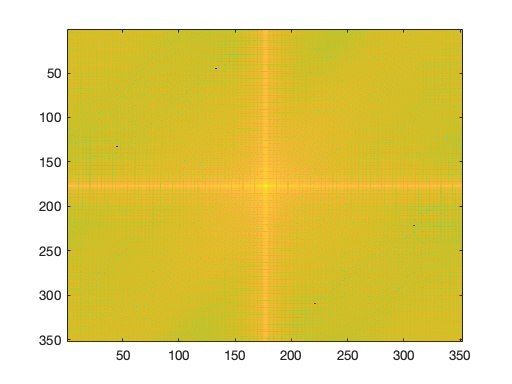

In [338]:
im = double(imread("images/lab2/rectangle.png")); 
f = fftshift(fft2(im));
figure; imagesc(im);
figure; imagesc(log(abs(f)));

### 3.11. Experiment with FFT of an odd-length signal (image) of small length.

For creating such a signal (image) use the command f = fftshift(fft2(rand(1,5))). What are some characteristic features of the centre value in f, i.e, f(1,3)? What are some char- acteristic features of the pair f(1,2) and f(1,4), as well as the pair f(1,1) and f(1,5)? Do you notice any symmetry in these values? Do you notice the same symmetry in an even length vector?
Now we want to perform some filtering in the Fourier domain. Start by putting the frequency in f(1,2) to zero, i.e, f(1,2) = 0, and then transform the frequency vector back to an image using im = ifft2(ifftshift(f)) Is the resulting image real valued or complex valued? Now, try to put both f(1,2) = 0, and f(1,4) = 0 and do the IFFT. Is the resulting image real valued or complex valued? How should you zero out the frequencies to get a real valued image when doing the IFFT? For these signals, or very small “images”, we recommend that you inspect the actual numbers by printing out the matrix in Matlab instead of viewing with imagesc.

### 3.12. Now modify the FFT representation of cameraman.png, by setting certain frequencies to 0, to create a low-pass version of the image.
Use a circular filter for best result, but feel free to simplify the task a square pattern of your filter. You may blank out a part of a matrix using slices, e.g. A(20:30, 50:60) = 0. The result image should be real valued after performing ifft2. Pay attention to the symmetry in the complex value that you observed in the previous exercise. You are not allowed to use the functions real or abs or similar ways to force a real valued result. In your report, clearly explain your algorithm or include your code and comment.

Now open the image freqdist.png. There is a pattern present in the image that should be filtered out. Remove it using notch filters in the frequency domain. This is similar to the case above, but you may need to be slightly more artistic when you blank out frequencies. Remember to take extra care to ensure the proper symmetry, so that your end result is a real-valued image after doing ifft2. Sometimes filtering produces signals that are outside the [0,255] range, so take extra care when your display the results using caxis or perhaps the command imcontrast.

### 3.13. Create a filter in the frequency-domain that suppresses the pattern in freqdist.png, but leaves the rest of the image as intact as possible. 
What does the filter look like? What do you see in the filtered image? Like the previous question, the result image should be real valued after performing ifft. You are not allowed to use the functions real or abs or similar ways to force a real valued result.
